In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [48]:
def analytical_solution():
    """
    Returns 2d analytical solution for two body problem and plots it.
    Reference https://docs.google.com/document/d/1dlax2B-H4VgyH45wYn1e66dDqkPSpc9hh7rfBMmfgic/edit for the
    source of the equation. 
    """

    # plot should range from 
    theta = np.arange(0, 361, 1)
    # lets try and take advantage of numpy broadcasting for efficiency
    r = 0.9/(1-0.91*np.cos(np.deg2rad(theta))) # radial coordinates
    # convert radial coordianates to cartesian to plot, again taking advantage
    # of numpy broad
    x = r * np.cos(np.deg2rad(theta)) 
    y = r * np.sin(np.deg2rad(theta))
    # time to plot
    plt.plot(x, y)
    # can add some labels and titles to the graph later
    # makes an oval, could use a change of scales to make this look better
    # but I believe this is working.

In [49]:
class trajectory_plotter:
    """
    Class which manages plotting the various different integration-based solutions to the two body problem.
    """

    def __init__(self, max_time):
        self.max_time = max_time
    

    def calc_acc(self, r):
        """
        Calculates acceleration specifically for the two body problem.
        R represents the position vector.  Returns the corresponding acceleration in vector form.
        """

        # np.linalg.norm can be used to get the magnitude/length of a vector.
        return -r / (np.linalg.norm(r) ** 3)
        
    def runga_kutta(self, time_step, r, v):
        """"
        Trajectory calculated using Runga-Kutta integration.
        Time step is passed in.
        r = initial position vector.
        v = initial velocity vector.
        See https://docs.google.com/document/d/1uaAO0XXq_4Jt9kDEPjBso5yYAt9QRnD9XUo8TcOTscI/edit
        for initial conditions and the source of the equations.
        """

        # vector quantities will be represented as numpy arrays to take advantage of broadcasting -
        # 0 refers to the x dim and 1 to the y dim.  Only 2d so no need for anything more at the moment.

        a = self.calc_acc(r) # initial acceleration - acceleration is equal to r / |r|^3

        # will need to store position and velocity for graphing parts 2 and 3
        # acceleration can be rederived from position or stored, not sure which is more efficient.
        # would need to benchmark if I really cared.

        positions = np.array(r)
        velocities = np.array(v)

        elapsed_time = 0 # this may be slightly vulnerable to floating point error - 
        # Think of a better solution if you have time.
        # Idea - figure out how many time steps can fit in the max time with division, and then
        # use an integer based iterator to get up to that number, especially since elapsed time
        # isnt actually necessary.

        while elapsed_time < self.max_time:
            elapsed_time += time_step
            r_1 = r + time_step * v + (time_step ** 2) / 2 * a  # calculate new position vector, making sure not to
            # overwrite the previous one since we need it for the halfstep
            r_halfstep = r + time_step/2 * v
            v = v + time_step * self.calc_acc(r_halfstep) # calculate new velocity
            r = r_1 # reassign r now that the half step calculation is done.
            a = self.calc_acc(r)  # calculate acceleration for our new position.

            positions = np.concatenate((positions, r), 1)  # concatenate is not efficient, would be far better off allocating before.
            velocities = np.concatenate((velocities, v), 1)
        plt.plot(positions[0, :], positions[1, :])


    def velocity_verlet(self, time_step, r, v):
        """
        Calculates two body trajectory using velocity verlet algorithm.
        time step - the time step for the algorithm.
        r = initial position vector.
        v = initial velocity vector.
        """

        a = self.calc_acc(r) # initial acceleration - acceleration is equal to r / |r|^3, this is calculated by calc_acc.

        positions = np.array(r)
        velocities = np.array(v)

        
        elapsed_time = 0

        while elapsed_time < self.max_time:
            elapsed_time += time_step
            r = r + time_step * v + time_step ** 2 / 2 * a
            a_1 = self.calc_acc(r)
            v = v + time_step/2*(a_1 + a)
            a = a_1

            positions = np.concatenate((positions, r), 1)  # concatenate is not efficient, would be far better off allocating before.
            # However, efficiency is not a massive concern at the moment.
            velocities = np.concatenate((velocities, v), 1)

            plt.plot(positions[0, :], positions[1, :])
            


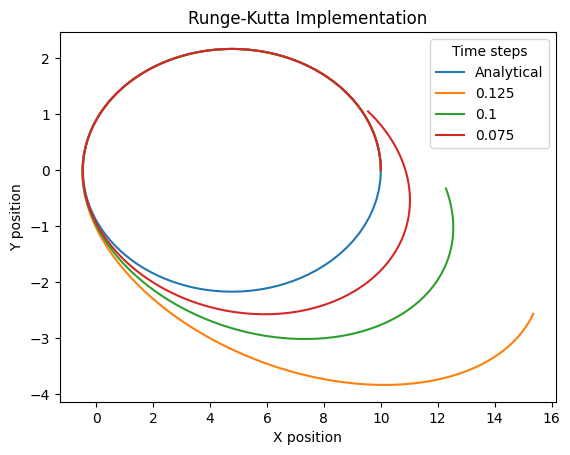

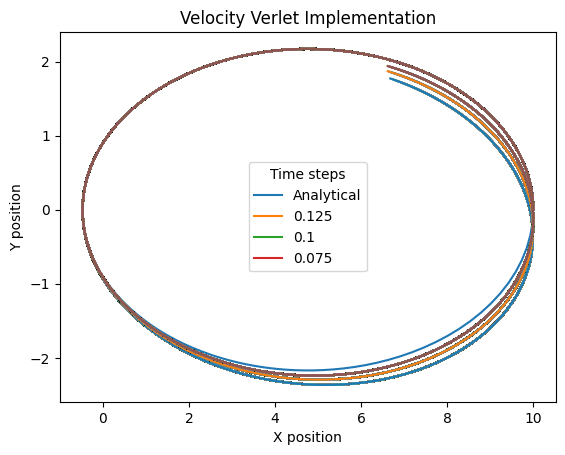

In [50]:

def main():
    """
    Driver function.
    Implementation of https://docs.google.com/document/d/1dlax2B-H4VgyH45wYn1e66dDqkPSpc9hh7rfBMmfgic/edit.
    Starts off with plotting 2d analytical solution, and then uses two different integration schemes to
    plot the trajectory of m1 - Runga-Kutta and Velocity Verlet.
    Generates three plots for each integration method with time steps of 0.125, 0.1, and 0.075  
    """

    analytical_solution()
    max_time = 100
    plotter = trajectory_plotter(max_time)
    r = np.array([10,0])  # initial position vector
    r = r.reshape((2,1))
    v = np.array([0, 0.3/math.sqrt(r[0])])  # initial velocity vector
    v = v.reshape((2,1))
    time_steps = [0.125, 0.1, 0.075]
    for time_step in time_steps:
        plotter.runga_kutta(time_step, r, v)
    plt.xlabel(xlabel="X position")
    plt.ylabel(ylabel="Y position")
    plt.title(label="Runge-Kutta Implementation")
    legends = ["Analytical"] + [str(x) for x in time_steps]
    plt.legend(legends, title="Time steps")
    plt.figure()
    analytical_solution()
    for time_step in time_steps:
        plotter.velocity_verlet(time_step, r, v)
    plt.xlabel(xlabel="X position")
    plt.ylabel(ylabel="Y position")
    plt.title(label="Velocity Verlet Implementation")
    plt.legend(legends, title="Time steps")

    
    
        


if __name__ == "__main__":
    main()